## Assignment 1 Kai Foerster (ID: 214288)

1.1 Write two text processing pipelines that create document feature matrices that do and do not preserve
the differences in the texts.

In [22]:
## Setting up notebook

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer

In [23]:
## Here is the text we want to process

texts = [
"I don't like cricket",
"You like cricket"
]

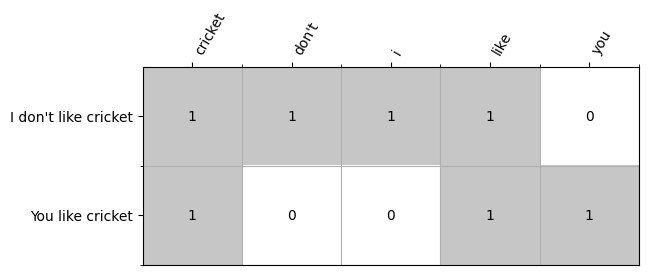

In [24]:
## Version 1: unigram features that do not preserve the difference in text

tk = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer=tk.tokenize)
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()


fig, ax = plt.subplots()

X = dfm.todense()

# Plot a heatmap of the dfm
ax.imshow(
    X,
    cmap = "Greys",
    norm = Normalize(vmin=0, vmax=3)
)

# Create a grid using minor ticks
ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
ax.grid(which="minor", zorder=5)

# Set up x labels
ax.xaxis.tick_top()
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(vocab, rotation=60, ha="left", va="bottom")

# Set up y labels
ax.set_yticks(range(len(texts)))
ax.set_yticklabels(texts)

# Put the numbers in
for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        ax.text(n, m, X[m, n], ha="center", va="center")

plt.savefig("plots/unigram_version.pdf", bbox_inches="tight")

c:\Users\kaius\.virtualenvs\TaD-programming-excercise1-3c7Qo_HW\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


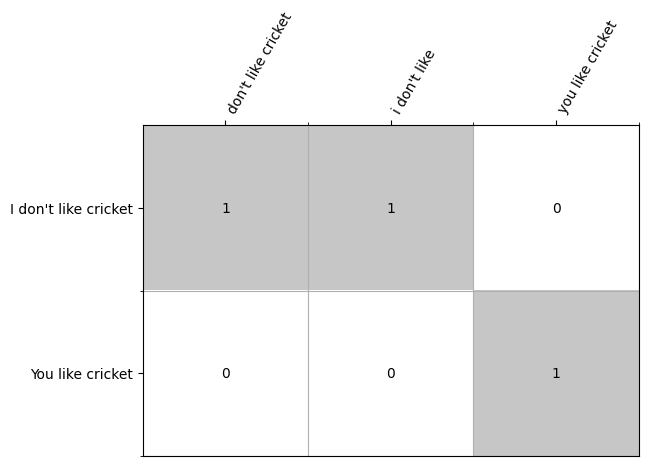

In [25]:
## Version 2: trigram features that DO preserve the difference in text

tk = TweetTokenizer()
vectorizer = CountVectorizer(ngram_range=(3, 3), tokenizer=tk.tokenize)
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

fig, ax = plt.subplots()

X = dfm.todense()

# Plot a heatmap of the dfm
ax.imshow(
    X,
    cmap = "Greys",
    norm = Normalize(vmin=0, vmax=3)
)

# Create a grid using minor ticks
ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
ax.grid(which="minor", zorder=5)

# Set up x labels
ax.xaxis.tick_top()
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(vocab, rotation=60, ha="left", va="bottom")

# Set up y labels
ax.set_yticks(range(len(texts)))
ax.set_yticklabels(texts)

# Put the numbers in
for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        ax.text(n, m, X[m, n], ha="center", va="center")

plt.savefig("plots/trigram_version.pdf", bbox_inches="tight")

1.2. Describe how the preprocessing choices you make affect the representation of those texts.

Answer: The ngrams features in the preprocessing step are crucial at capturing the negation in the first document which distinguishes it from the second document. This is because the trigram features are able to fully represent the negation which extents over two words in the first document, while the unigram features are unable to do that. A bigram feature is not enough to distinguish the two documents fully because "like cricket" is one of its vocabulary which deludes the meaning of the first document by giving the impression that the document has a positive sentiment towards cricket.

1.3. Give one example each of tasks where your text preprocessing choices that do not preserve the differences
in the texts would and would not limit our ability to perform the task.

Example where unigram features limit the task: Victim vs. preditor detection, for example in context of femicide analysis in newspaper articles. The problem is that with unigram features we are left without a link between subject and object as well as the link between subject and predicate which disables us from understanding who did what to whom and thereby who the preditor is and who the victim is.

Example where unigram features DO NOT limit the task: A simple topic classification. In most cases it is enough to calculate the similarity between single words and keywords we selected to be associated with a topic (or to simply count how many keywords show up in a document) to classify documents into topics.

2.1. Turn these texts into a document feature matrix without any additional pre-processing steps

In [26]:
## Here is the text we want to process

texts = [
"Climatic change is causing adverse impacts",
"Changes in the climate have caused impacts to human systems",
"Chelsea have a goal difference of zero in the premier league this season"
]

c:\Users\kaius\.virtualenvs\TaD-programming-excercise1-3c7Qo_HW\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


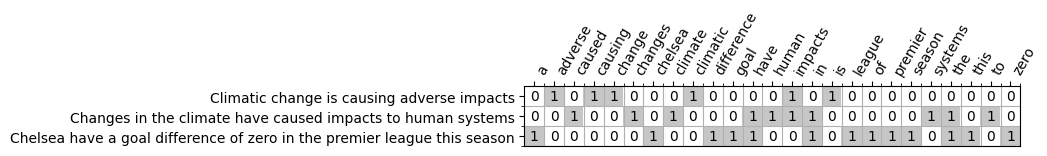

In [27]:
## Version 1: unigram features that do not preserve the difference in text

tk = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer=tk.tokenize, dtype=np.int32)
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()


fig, ax = plt.subplots()

X = dfm.todense()

# Plot a heatmap of the dfm
ax.imshow(
    X,
    cmap = "Greys",
    norm = Normalize(vmin=0, vmax=3)
)

# Create a grid using minor ticks
ax.set_xticks(np.arange(X.shape[1])+0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0])+0.5, minor=True)
ax.grid(which="minor", zorder=5)

# Set up x labels
ax.xaxis.tick_top()
ax.set_xticks(np.arange(X.shape[1]))
ax.set_xticklabels(vocab, rotation=60, ha="left", va="bottom")

# Set up y labels
ax.set_yticks(range(len(texts)))
ax.set_yticklabels(texts)

# Put the numbers in
for m in range(X.shape[0]):
    for n in range(X.shape[1]):
        ax.text(n, m, X[m, n], ha="center", va="center")

plt.savefig("plots/unigram_version.pdf", bbox_inches="tight")

In [28]:
# Calculate text similarity
def text_similarity(matrix):
    num_texts = matrix.shape[0]
    similarity_matrix = np.zeros((num_texts, num_texts), dtype=int)

    for i in range(num_texts):
        for j in range(i + 1, num_texts):
            # Count the number of common non-zero elements in the CSR matrix
            similarity = np.sum(np.minimum(matrix[i].toarray(), matrix[j].toarray()))
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

    return similarity_matrix

# Calculate text similarity for your CSR sparse matrix
similarity_matrix = text_similarity(dfm)

# Print the similarity matrix
#print("Text Similarity Matrix:")
#print(similarity_matrix)

print("Document 1 and 2 have", similarity_matrix[0,1], "common features")
print("Document 1 and 3 have", similarity_matrix[0,2], "common features")
print("Document 2 and 3 have", similarity_matrix[1,2], "common features")

Document 1 and 2 have 1 common features
Document 1 and 3 have 0 common features
Document 2 and 3 have 3 common features


In [29]:
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaius\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
def porter_tokenizer(text):
    porter = PorterStemmer()
    return [porter.stem(word) for word in word_tokenize(text)]

vectorizer = CountVectorizer(stop_words= "english", tokenizer= porter_tokenizer)
dfm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names_out()

c:\Users\kaius\.virtualenvs\TaD-programming-excercise1-3c7Qo_HW\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\kaius\.virtualenvs\TaD-programming-excercise1-3c7Qo_HW\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'som

In [31]:
similarity_matrix = text_similarity(dfm)

# Print the similarity matrix
#print("Text Similarity Matrix:")
#print(similarity_matrix)

print("Document 1 and 2 have", similarity_matrix[0,1], "common features")
print("Document 1 and 3 have", similarity_matrix[0,2], "common features")
print("Document 2 and 3 have", similarity_matrix[1,2], "common features")

Document 1 and 2 have 4 common features
Document 1 and 3 have 0 common features
Document 2 and 3 have 0 common features


2.4. Comment on why the additional pre-processing steps created a more useful representation of the texts in
this case.

Answer: There were similar words between the first two documents which however did not flag as similar given they were different tenses or conjugation. By stemming these words, these words got flagged as the "same" which increased the similarity between the first and second document.